# 01 - Khám phá dữ liệu (EDA - Insight)

Phân tích cấu trúc, chất lượng, thống kê mô tả healthcare stroke dataset.

## 1. Đọc dữ liệu và import thư viện

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

data_path = '../healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
print(f'Shape: {df.shape}')
df.head()

Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. Kiểm tra thông tin tổng quan, giá trị thiếu, kiểu dữ liệu

In [15]:
# Thông tin tổng quan và giá trị thiếu
df.info()
missing = df.isna().sum().to_frame('missing')
missing['pct'] = missing['missing'] / len(df) * 100
print(missing[missing['missing']>0].sort_values('missing', ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
     missing       pct
bmi      201  3.933464


In [16]:
# 1. Xử lý thiếu cho bmi + tạo cột cờ
df['bmi_missing'] = df['bmi'].isna().astype(int)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# 2. Chuyển object → category
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in cat_cols:
    df[c] = df[c].astype('category')

# 3. Loại bỏ cột id (không mang thông tin dự báo)
df = df.drop(columns=['id'])

# Kiểm tra lại
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
 11  bmi_missing        5110 non-null   int32   
dtypes: category(5), float64(3), int32(1), int64(3)
memory usage: 285.3 KB


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bmi_missing          0
dtype: int64

## 3. Thống kê mô tả, kiểm tra phân phối, outlier

### Nhận xét nhanh (thống kê & phân phối)
- Biến số trung bình/median đáng chú ý: ... ; độ lệch/outlier: ...
- Biến phân loại có tần suất lệch nhiều: ...

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
bmi_missing,5110.0,0.039335,0.194409,0.00,0.000,0.000,0.00,1.00



gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


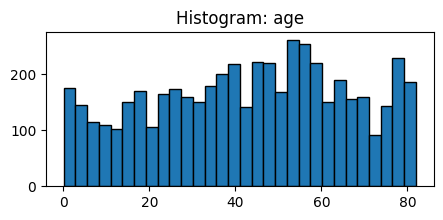

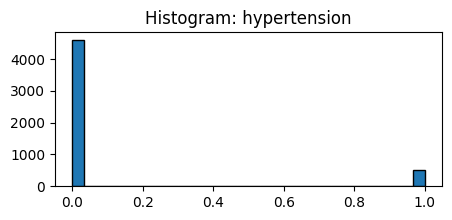

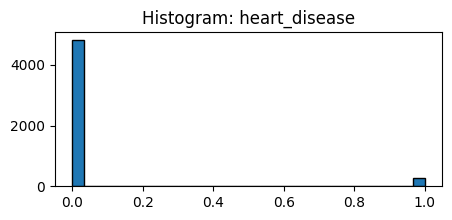

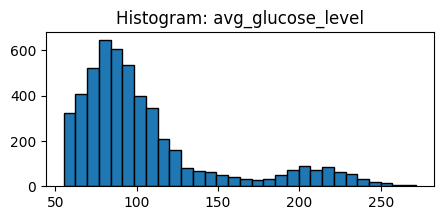

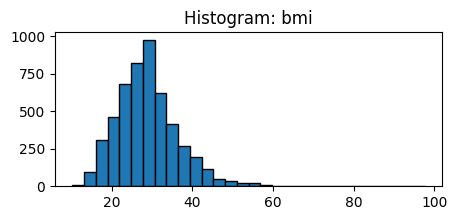

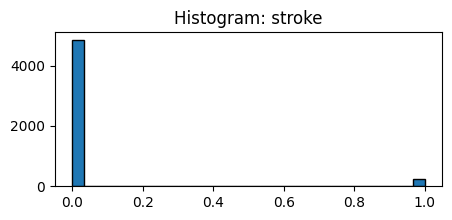

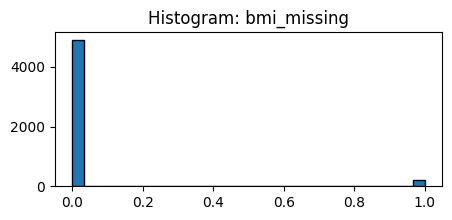

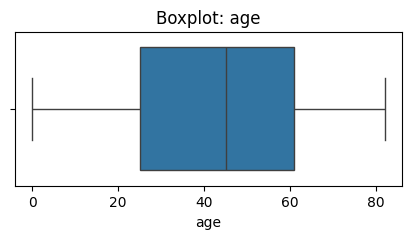

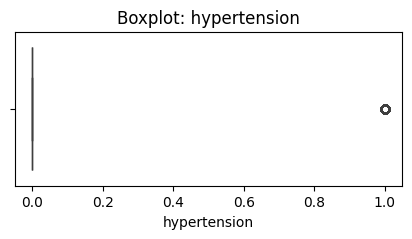

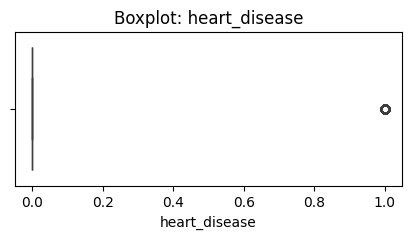

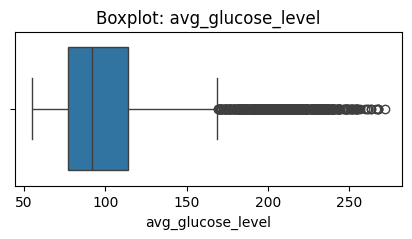

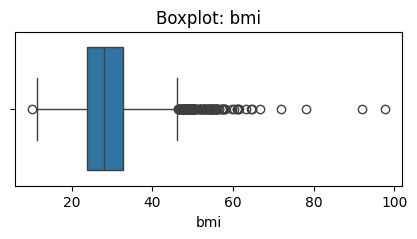

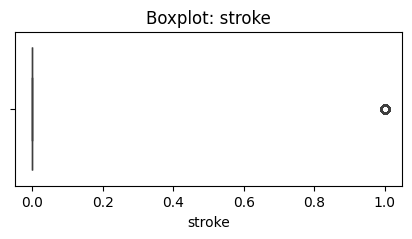

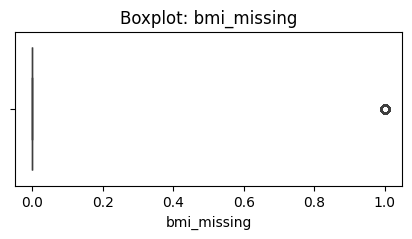

In [17]:
# Thống kê mô tả
numeric_desc = df.describe(include=[np.number]).T
display(numeric_desc)

# Categorical summary
for col in df.select_dtypes(include=['category']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

# Vẽ histogram cho các biến số
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5,2))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram: {col}')
    plt.show()

# Boxplot kiểm tra outlier
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

### Nhận xét nhanh (cân bằng lớp)
- Tỷ lệ lớp 0/1: ... / ... (%). Mất cân bằng mạnh? Có cần xử lý (SMOTE/weights) không: ...

## 4. Kiểm tra cân bằng lớp (Class Balance)
- Kiểm tra phân phối biến mục tiêu (target: 'stroke')
- Vẽ biểu đồ bar cho biến mục tiêu

### Nhận xét nhanh (tương quan)
- Cặp biến tương quan cao (>|0.7|): ...
- Biến liên quan đến target (nếu target numeric, xem cột stroke nếu là số; nếu không, cần phân tích thêm sau encode): ...

stroke
0    4861
1     249
Name: count, dtype: int64


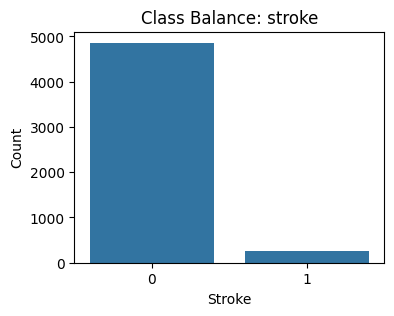

In [18]:
# Kiểm tra phân phối biến mục tiêu (stroke)
class_counts = df['stroke'].value_counts()
print(class_counts)

plt.figure(figsize=(4,3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Balance: stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

## 5. Phân tích tương quan (Correlation Analysis)
- Tính ma trận tương quan cho các biến số
- Vẽ heatmap để trực quan hóa mối quan hệ giữa các biến

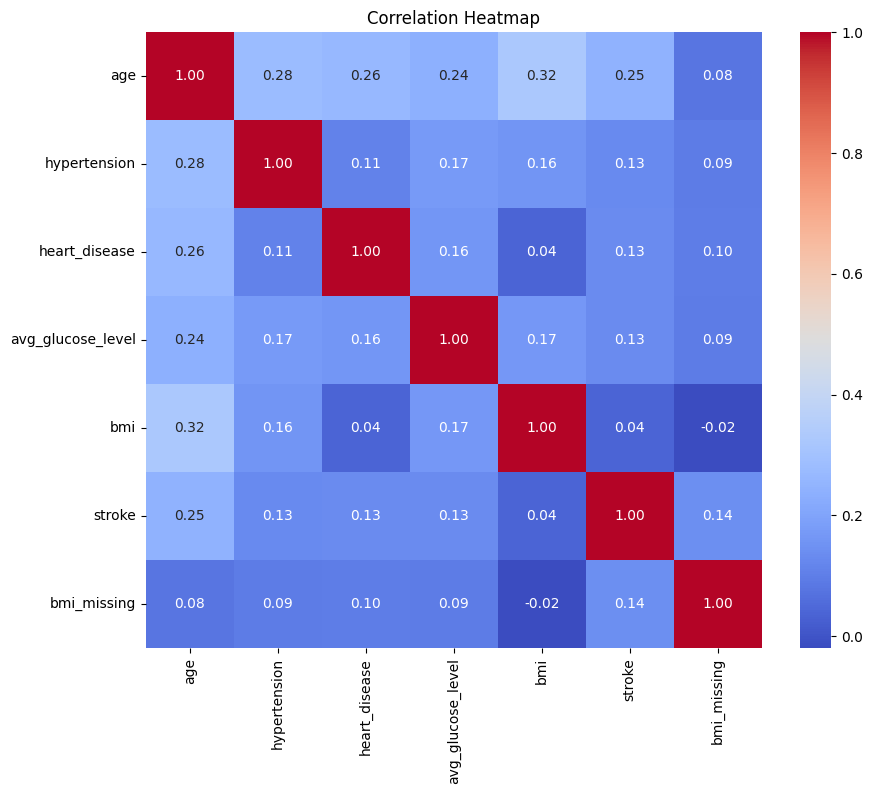

In [19]:
# Ma trận tương quan và heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## 6. Tổng kết EDA & hành động tiếp theo
- Tóm tắt 3–5 điểm chính từ các nhận xét ở từng bước trên.
- Liệt kê hành động: xử lý missing (median/mode), outlier (capping/transform), cân bằng lớp (class_weight/SMOTE), encode/cast dtype.